In [0]:
!pip install -U PyDrive

    100% |████████████████████████████████| 993kB 19.7MB/s 
  Running setup.py bdist_wheel for PyDrive ... - \ done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib 
from pprint import pprint
from pathlib import Path
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
import warnings
from IPython.display import display, Markdown

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import plotly
plotly.tools.set_credentials_file(username='glarrea', api_key='DIZJYE2ZGzQ5NHiRZ7xK')

import plotly.plotly as py
import plotly.graph_objs as go
import scipy.cluster.hierarchy as hac
import tensorflow as tf
from keras import regularizers 
from keras import backend as K
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
#Import authentication libraries

from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

%matplotlib inline
%config IPCompleter.greedy=True
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5644402986541479895
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7120577470159586893
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11235657894729065786
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11280557671
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1482690980656577805
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
folder_id='1ueCCZhalRvmM2nXLA1gZihsYJHDNqDXr'
# folder_id='1uXkcRXuQ5fFG0S8mLW67ewj_jsqAb_Ff'

In [0]:
# # Auto-iterate through all files in the midi folder.
file_list = drive.ListFile({'q': "'{0}' in parents and trashed=false".format(folder_id)}).GetList()
for file1 in file_list:
  print('title: {0}, id: {1}'.format(file1['title'], file1['id']))

title: dato_peru.csv, id: 1ADx0SZP4XdYrOQ23ga88slwwuFQWKMcQ
title: training_deforested_7x7_roi_6_v3.csv, id: 1Vcfv1OR3BNRbokA8nfj8NJ7qK0ZSGqMy
title: training_deforested_7x7_roi_8_v3.csv, id: 1_e4ENK7gz1umTLPc0oxrQO3AjcVXOZ1w
title: training_deforested_7x7_roi_4_v3.csv, id: 1LuBmCNtc4I1pHMd305WRcy_OzUWBsjUB
title: matrix_losses.png, id: 1DA5DMygFtBXJfRity32C7O25dgNd8rHs
title: loss_per_meter_salvacion_bocamanu.csv, id: 1tW7V6jVLLuEX53EDiqGTeBUkeFlFTrLT
title: tress_search.png, id: 1_oDOV5LefrFxDAUqRyjrRTnR_DojJmJM
title: NN_256_acc_per_regre.png, id: 1vg1wWHHrWNZAVHv4S9ApTwzz2JAFcTBm
title: data processing, id: 1KYoap_I5ukjN5mGQXniBKg0PgG-BJvg9YzOk2AyaVHc
title: NN_256_acc_per.png, id: 1IMOoie-yOXTJqw0p4ajz87hZJEgm_4D8
title: NN_256_acc_8.png, id: 1tqWXuP6kPl97jNQ_tn1N9XPECctbevBN
title: NN_256_acc_6.png, id: 1Tyz7e_5THGLx5OSTdkNglWc7gEnJt8rt
title: NN_256_acc_4.png, id: 1fS_SGkfmz6uhC9t2cIXWGRK2KAyMyZ5s
title: NN_256_acc_3.png, id: 12HY61qrx4moIL8RWx4Mp3KNSqhsdMISu
title: NN_256_acc_1

In [0]:
# Download all midi files
for file1 in file_list:
  file_id=file1['id']
  file_title = file1['title']
  if '.csv' in file_title:
    drive.CreateFile({'id': file_id}).GetContentFile(file_title)
  

In [0]:
from sklearn import metrics

def print_binary_confusion_matrix(matrix):
    TN = matrix[0,0]
    FN = matrix[1,0]
    FP = matrix[0,1]
    TP = matrix[1,1]

    print ('              +-----------------+')
    print ('              |   Predicción    |')
    print ('              +-----------------+')
    print ('              |    +   |    -   |')
    print ('+-------+-----+--------+--------+')
    print ('| Valor |  +  |  {:5d} |  {:5d} |'.format(TP, FN) )
    print ('| real  +-----+--------+--------+')
    print ('|       |  -  |  {:5d} |  {:5d} |'.format(FP, TN) )
    print ('+-------+-----+--------+--------+')

## Read data

In [0]:
df_1 = pd.read_csv('training_deforested_7x7_roi_1_v3.csv', sep=',')
df_3 = pd.read_csv('training_deforested_7x7_roi_3_v3.csv', sep=',')
df_4 = pd.read_csv('training_deforested_7x7_roi_4_v3.csv', sep=',')
df_6 = pd.read_csv('training_deforested_7x7_roi_6_v3.csv', sep=',')
df_8 = pd.read_csv('training_deforested_7x7_roi_8_v3.csv', sep=',')

tous = [df_1, df_3, df_4,df_6,df_8]

df_tot=result = pd.concat(tous)

datasets = [df_1,df_3,df_4,df_6,df_8,df_tot]
# datasets = [df_1] #for testing
# datasets = list(map(lambda x: x.drop(['carbon_density','system:index', '.geo','cluster_mean'],axis=1), datasets))
datasets = list(map(lambda x: x.drop(['carbon_density','system:index', 'cluster_mean'],axis=1), datasets))



In [0]:
datasets[1]['.geo'][0]

'{"geodesic":false,"type":"Point","coordinates":[-73.15842252406824,-3.3147001831856073]}'

## Explore variables

In [0]:
for i in datasets:
    print(np.unique(i['cluster'], return_counts=True))

(array([0, 1]), array([9282, 9996]))
(array([0, 1]), array([9993, 9999]))
(array([0, 1]), array([ 9998, 10000]))
(array([0, 1]), array([ 9958, 10000]))
(array([0, 1]), array([ 9998, 10000]))
(array([0, 1]), array([49229, 49995]))


# Decision tree

In [0]:
X = df.drop('cluster', axis=1)
y = df['cluster']
X_trainval, X_test, y_trainval, y_test = train_test_split(X,y,test_size=0.1,random_state =0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, test_size=0.3,random_state =0)

In [0]:
rf_acc_test=[]
rf_acc_train=[]

cluster_in_model=[]
trees_score = []
trees = np.arange(2,300,10) #number of trees
for df in datasets:
    X = df.drop('cluster', axis=1)
    y = df['cluster']
    X_trainval, X_test, y_trainval, y_test = train_test_split(X,y,test_size=0.1,random_state =0)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, test_size=0.3,random_state =0)
    
    # Utilizando Random Forest
    from sklearn.metrics import classification_report, confusion_matrix

    params_rf = {'criterion':['gini'],
             'n_estimators':trees,
             'max_features':['sqrt'],
             'max_depth':[None]};

    rf = RandomForestClassifier(criterion= 'gini', oob_score=True, random_state=0)#revisar
    grid_rf = GridSearchCV(rf,param_grid=params_rf,n_jobs=4, verbose=2, cv=4).fit(X_train,y_train)

    y_predicted = grid_rf.predict(X_test)
    score_test = grid_rf.score(X_test,y_test)
    rf_acc_test.append(score_test)
    rf_acc_train.append(grid_rf.score(X_train,y_train))
    cm_rf =confusion_matrix(y_test,y_predicted)
#     print_binary_confusion_matrix (cm_rf) #revisar
    
    scores = [x[1] for x in grid_rf.grid_scores_]
    scores = np.array(scores).reshape(trees.shape[0],1)
    trees_score.append(scores)

    
    
    
    cluster_in_this_model = []
    for df in datasets:
      X = df.drop('cluster', axis=1)
      y = df['cluster']
      X_trainval, X_test, y_trainval, y_test = train_test_split(X,y,test_size=0.1,random_state =0)
      X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, test_size=0.3,random_state =0)
      score_test = grid_rf.score(X_test,y_test)
      cluster_in_this_model.append(score_test)
    cluster_in_model.append(cluster_in_this_model)

    
    
##Exporting nTree graph
    
new_tree=np.array(trees_score).squeeze(axis=2)
cases = ['MDD','Iquitos','Tarapoto', 'Ucayali', 'Pucallpa', 'Peru']
clusters = [1,2,4,6,8,10]
datalist = []

for ind,cluster in enumerate(clusters):
  
  tree_data = np.stack((new_tree[ind],trees, np.repeat(cluster,len(trees))),axis=1)
  datalist.append(tree_data)

tree_df = pd.DataFrame(np.array(datalist).reshape((len(clusters)*len(trees),3)),columns=['acc','nTrees','cluster']) 
tree_df.to_csv('tree_df.csv', sep=',', encoding='utf-8')

file_ntree = drive.CreateFile({'parents':[{u'id': folder_id}]})
file_ntree.SetContentFile('tree_df.csv')
file_ntree.Upload()   


##Exporting matrix of accuracies
matrix = pd.DataFrame(cluster_in_model)
matrix.to_csv('matrix.csv', sep=',', encoding='utf-8')
file_matrix = drive.CreateFile({'parents':[{u'id': folder_id}]})
file_matrix.SetContentFile('matrix.csv')
file_matrix.Upload()
    

In [0]:
feat_importance = pd.DataFrame({'cols':X.columns, 'imp':grid_rf.best_estimator_.feature_importances_}).sort_values('imp', ascending=False)
feat_importance

,cols,imp
4,distance_nac,0.112725
0,altitude,0.111304
1,distance_any,0.107384
9,longitude,0.105484
7,distance_villages,0.103677
8,latitude,0.103527
5,distance_parks,0.101430
6,distance_vec,0.095280
3,distance_dep,0.084914
2,distance_buffer,0.074275


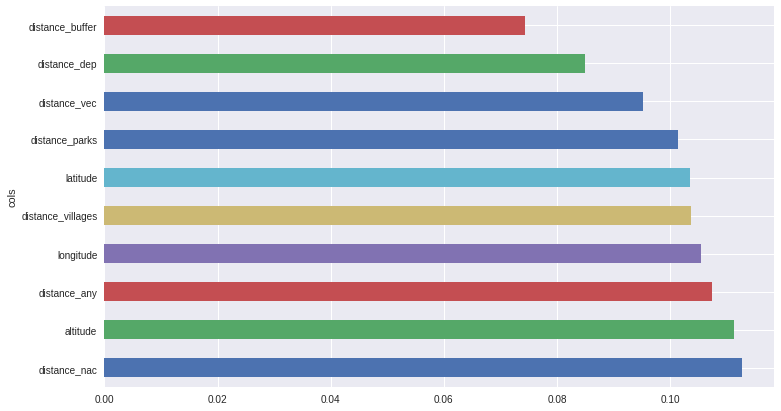

In [0]:
  feat_importance.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False);

In [0]:
tree_df = pd.DataFrame(np.array(datalist).reshape((len(clusters)*len(trees),3)),columns=['acc','nTrees','cluster']) 
tree_df.to_csv('tree_df.csv', sep=',', encoding='utf-8')

file_ntree = drive.CreateFile({'parents':[{u'id': folder_id}]})
file_ntree.SetContentFile('tree_df.csv')
file_ntree.Upload()  

In [0]:
matrix = pd.DataFrame(cluster_in_model)
matrix.to_csv('matrix.csv', sep=',', encoding='utf-8')
file_matrix = drive.CreateFile({'parents':[{u'id': folder_id}]})
file_matrix.SetContentFile('matrix.csv')
file_matrix.Upload()

In [0]:
# for ind, i in enumerate(cases):
#   plt.plot(trees, new_tree[ind], label='Tree: ' + str(i))
# plt.legend()
# plt.xlabel('Gamma')
# plt.ylabel('Mean score')
# plt.show()

In [0]:
new_tree=np.array(trees_score).squeeze(axis=2)
cases = ['MDD','Iquitos','Tarapoto', 'Ucayali', 'Pucallpa', 'Peru']
clusters = [1,2,4,6,8,10]
datalist = []
for ind,cluster in enumerate(clusters):
  
  tree_data = np.stack((new_tree[ind],trees, np.repeat(cluster,len(trees))),axis=1)
  
  datalist.append(tree_data)
 
tree_df = pd.DataFrame(np.array(datalist).reshape((len(clusters)*len(trees),3)),columns=['acc','nTrees','cluster']) 
tree_df.to_csv('tree_df.csv', sep=',', encoding='utf-8')

file_ntree = drive.CreateFile({'parents':[{u'id': folder_id}]})
file_ntree.SetContentFile('tree_df.csv')
file_ntree.Upload()


In [0]:
print(rf_acc_test)
print(rf_acc_train)
matrix = pd.DataFrame(cluster_in_model)
matrix.to_csv('matrix.csv', sep=',', encoding='utf-8')


file_matrix = drive.CreateFile({'parents':[{u'id': folder_id}]})
file_matrix.SetContentFile('matrix.csv')
file_matrix.Upload()

[0.8272821576763485, 0.828, 0.798, 0.8026052104208417, 0.6905, 0.788773556384158]
[1.0, 0.9999205971097348, 0.99738053659311, 0.9999204644873936, 0.9902365454834101, 0.9758438649816029]


# Logistic regression

AttributeError: ignored

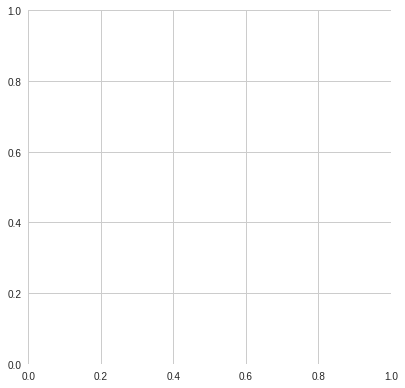

In [0]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Load the example iris dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

In [0]:
!pip uninstall seaborn

Uninstalling seaborn-0.9.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/seaborn-0.9.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/seaborn/*
Proceed (y/n)? y
  Successfully uninstalled seaborn-0.9.0


In [0]:
!pip3 --no-cache-dir install seaborn

    100% |████████████████████████████████| 215kB 5.7MB/s 


In [0]:
matrix

,0,1,2,3,4,5
0,0.918050,0.5000,0.5015,0.486974,0.4910,0.578253
1,0.485477,0.9440,0.4845,0.510020,0.4875,0.581880
2,0.487552,0.4940,0.9285,0.504008,0.4880,0.588935
3,0.493257,0.5035,0.5065,0.922345,0.5120,0.593369
4,0.491183,0.5355,0.5165,0.492485,0.8915,0.582183
5,0.908195,0.9240,0.9080,0.906814,0.8710,0.907790


In [0]:
log_acc_test=[]
log_acc_train=[]
for df in datasets:
    X = df.drop('cluster', axis=1)
    y = df['cluster']
    X_trainval, X_test, y_trainval, y_test = train_test_split(X,y,test_size=0.1)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, test_size=0.3)
    params_log = {'C':[0.5,1]};
    log = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, random_state=0, max_iter=100)
    grid_log = GridSearchCV(log,param_grid=params_log,n_jobs=4, verbose=10).fit(X_train,y_train)
    y_predicted = grid_log.predict(X_test)
    score_test = grid_log.score(X_test,y_test)
    log_acc_test.append(score_test)
    log_acc_train.append(grid_log.score(X_train,y_train))
    cm_rf =confusion_matrix(y_test,y_predicted)
    print_binary_confusion_matrix (cm_rf) #revisar

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=0.5 ...........................................................
[CV] C=0.5 ...........................................................
[CV] C=0.5 ...........................................................
[CV] C=1 .............................................................
[CV] ................... C=0.5, score=0.748332921709064, total=   0.3s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.7490738453939244, total=   0.4s
[CV] C=1 .............................................................
[CV] .................. C=0.5, score=0.7497529644268774, total=   0.5s
[CV] .................. C=0.5, score=0.7176383399209486, total=   0.6s


[Parallel(n_jobs=4)]: Done   2 out of   6 | elapsed:    0.5s remaining:    0.9s
[Parallel(n_jobs=4)]: Done   3 out of   6 | elapsed:    0.6s remaining:    0.6s


[CV] .................... C=1, score=0.7490118577075099, total=   0.4s
[CV] .................... C=1, score=0.7186264822134387, total=   0.4s


[Parallel(n_jobs=4)]: Done   4 out of   6 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:    0.9s finished


              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    831 |    161 |
| real  +-----+--------+--------+
|       |  -  |    367 |    569 |
+-------+-----+--------+--------+
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=0.5 ...........................................................
[CV] C=0.5 ...........................................................
[CV] C=0.5 ...........................................................
[CV] C=1 .............................................................
[CV] .................. C=0.5, score=0.6643639828489757, total=   0.2s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.6648404001905669, total=   0.3s
[CV] .................. C=0.5, score=0.6657932348737494, total=   0.3s
[CV] .................. C=0.5, score=0.6643639828489757, total=   0

[Parallel(n_jobs=4)]: Done   2 out of   6 | elapsed:    0.4s remaining:    0.8s
[Parallel(n_jobs=4)]: Done   3 out of   6 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=4)]: Done   4 out of   6 | elapsed:    0.4s remaining:    0.2s


[CV] .................... C=1, score=0.6719866603144354, total=   0.2s


[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:    0.6s finished


              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    755 |    257 |
| real  +-----+--------+--------+
|       |  -  |    420 |    568 |
+-------+-----+--------+--------+
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=0.5 ...........................................................
[CV] C=0.5 ...........................................................
[CV] C=0.5 ...........................................................
[CV] C=1 .............................................................
[CV] .................. C=0.5, score=0.7561324124791617, total=   0.3s
[CV] C=1 .............................................................
[CV] .................. C=0.5, score=0.7376190476190476, total=   0.6s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.7373809523809524, total=   0

[Parallel(n_jobs=4)]: Done   2 out of   6 | elapsed:    0.6s remaining:    1.3s
[Parallel(n_jobs=4)]: Done   3 out of   6 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=4)]: Done   4 out of   6 | elapsed:    0.8s remaining:    0.4s


[CV] ..................... C=1, score=0.755656108597285, total=   0.5s
[CV] ...................... C=1, score=0.75779947606573, total=   0.4s


[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:    1.0s finished


              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    794 |    178 |
| real  +-----+--------+--------+
|       |  -  |    321 |    707 |
+-------+-----+--------+--------+
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=0.5 ...........................................................
[CV] C=0.5 ...........................................................
[CV] C=0.5 ...........................................................
[CV] C=1 .............................................................
[CV] .................. C=0.5, score=0.7192270992366412, total=   0.2s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.7401574803149606, total=   0.2s
[CV] C=1 .............................................................
[CV] .................. C=0.5, score=0.7401574803149606, total=   0

[Parallel(n_jobs=4)]: Done   2 out of   6 | elapsed:    0.5s remaining:    1.0s
[Parallel(n_jobs=4)]: Done   3 out of   6 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=4)]: Done   4 out of   6 | elapsed:    0.6s remaining:    0.3s


[CV] .................... C=1, score=0.7279236276849642, total=   0.2s


[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:    0.8s finished


              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    853 |    149 |
| real  +-----+--------+--------+
|       |  -  |    354 |    640 |
+-------+-----+--------+--------+
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=0.5 ...........................................................
[CV] C=0.5 ...........................................................
[CV] C=1 .............................................................
[CV] C=0.5 ...........................................................
[CV] .................. C=0.5, score=0.6421428571428571, total=   0.4s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.6423809523809524, total=   0.5s
[CV] C=1 .............................................................
[CV] ................... C=0.5, score=0.631578947368421, total=   0

[Parallel(n_jobs=4)]: Done   2 out of   6 | elapsed:    0.6s remaining:    1.2s
[Parallel(n_jobs=4)]: Done   3 out of   6 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=4)]: Done   4 out of   6 | elapsed:    0.7s remaining:    0.3s


[CV] .................... C=1, score=0.6325315551321743, total=   0.4s
[CV] .................... C=1, score=0.6365801381281257, total=   0.3s


[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:    1.0s finished


              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    692 |    270 |
| real  +-----+--------+--------+
|       |  -  |    474 |    564 |
+-------+-----+--------+--------+


In [0]:
print(log_acc_test)
print(log_acc_train)

[0.7261410788381742, 0.6615, 0.7505, 0.7479959919839679, 0.628]
[0.7398929600658707, 0.6670636811179927, 0.750833465629465, 0.7336355682812375, 0.6384346721701858]


In [0]:
nb_acc_test=[]
nb_acc_train=[]
for df in datasets:
    X = df.drop('cluster', axis=1)
    y = df['cluster']
    X_trainval, X_test, y_trainval, y_test = train_test_split(X,y,test_size=0.1)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, test_size=0.3)
    
    nb = GaussianNB().fit(X_train,y_train)
    
    y_predicted = nb.predict(X_test)
    score_test = nb.score(X_test,y_test)
    nb_acc_test.append(score_test)
    nb_acc_train.append(nb.score(X_train,y_train))
    cm_rf =confusion_matrix(y_test,y_predicted)
    print_binary_confusion_matrix (cm_rf) #revisar

              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    904 |    101 |
| real  +-----+--------+--------+
|       |  -  |    501 |    422 |
+-------+-----+--------+--------+
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    888 |     91 |
| real  +-----+--------+--------+
|       |  -  |    751 |    270 |
+-------+-----+--------+--------+
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    921 |     69 |
| real  +-----+--------+--------+
|       |  -  |    649 |    361 |
+-------+-----+--------+--------+
              +-----------------+
              |   Predicción    |
              

In [0]:
print(nb_acc_test)
print(nb_acc_train)

[0.6877593360995851, 0.579, 0.641, 0.6648296593186372, 0.6185]
[0.6783861671469741, 0.5797999047165316, 0.6474837275758056, 0.6629284975741668, 0.6109699952373393]


In [0]:
df_1 = pd.read_csv('training_deforested_7x7_roi_1_v3.csv', sep=',')
df_3 = pd.read_csv('training_deforested_7x7_roi_3_v3.csv', sep=',')
df_4 = pd.read_csv('training_deforested_7x7_roi_4_v3.csv', sep=',')
df_6 = pd.read_csv('training_deforested_7x7_roi_6_v3.csv', sep=',')
df_8 = pd.read_csv('training_deforested_7x7_roi_8_v3.csv', sep=',')

tous = [df_1, df_3, df_4,df_6,df_8]

df_tot=result = pd.concat(tous)

datasets = [df_1,df_3,df_4,df_6,df_8,df_tot]
# datasets = [df_1] #for testing
# datasets = list(map(lambda x: x.drop(['carbon_density','system:index', '.geo','cluster_mean'],axis=1), datasets))
datasets = list(map(lambda x: x.drop(['carbon_density','system:index','.geo', 'cluster_mean'],axis=1), datasets))


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD
from keras import regularizers 
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
nn_1_4_acc_test=[]
nn_1_4_acc_train=[]
nn_1_4_logs=[]
for df in datasets:
  X = df.drop('cluster', axis=1)
  y = df['cluster']
  
  from sklearn import preprocessing
  X_trainval, X_test, y_trainval, y_test = train_test_split(X,y,test_size=0.1)
  scaler = preprocessing.StandardScaler().fit(X_trainval)
  X_trainval = scaler.transform(X_trainval)
  
  X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, test_size=0.3)
  
  X_test = scaler.transform(X_test) 

  model = Sequential([

      Dense(4, activation='sigmoid',input_shape=(10,)),
      Dense(1, activation='sigmoid')])
  
  model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), metrics=['accuracy'])
  log = model.fit(X_train, y_train, epochs=500, batch_size=256, validation_data=[X_val, y_val])
  _, test_acc = model.evaluate(x=X_test, y=y_test,verbose=1)
  train_acc = log.history['acc'][-1]
  nn_1_4_acc_test.append(test_acc)
  nn_1_4_acc_train.append(train_acc)
  nn_1_4_logs.append(log)
  K.clear_session()

training_nn_1_4 = pd.DataFrame()
for log in nn_1_4_logs:
  label=np.repeat('nn_1_4',len(log.history['val_loss']))
  df = pd.DataFrame(dict(loss=log.history['loss'], val_loss=log.history['val_loss'], model=label))
  training_nn_1_4 = training_nn_1_4.append(df, ignore_index = True) 
training_nn_1_4.to_csv('training_nn_1_4.csv', sep=',', encoding='utf-8')

folder_id = '1ueCCZhalRvmM2nXLA1gZihsYJHDNqDXr'
file = drive.CreateFile({'parents':[{u'id': folder_id}]})
file.SetContentFile('training_nn_1_4.csv')
file.Upload()

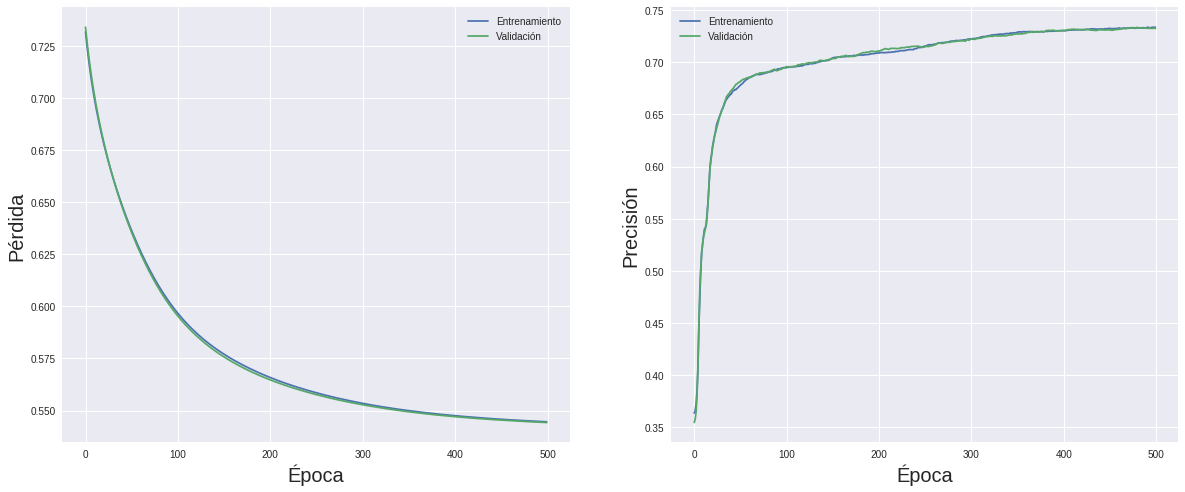

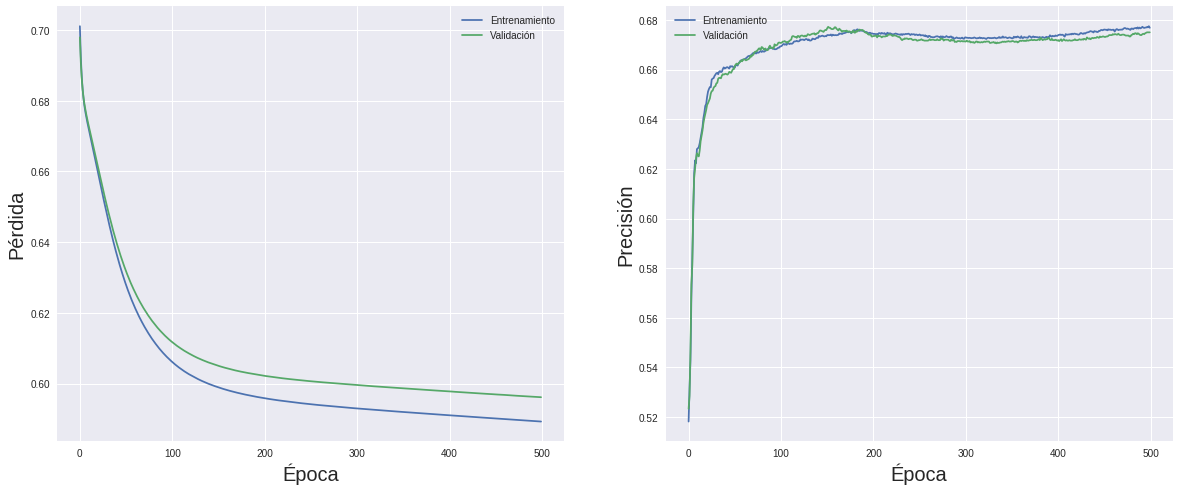

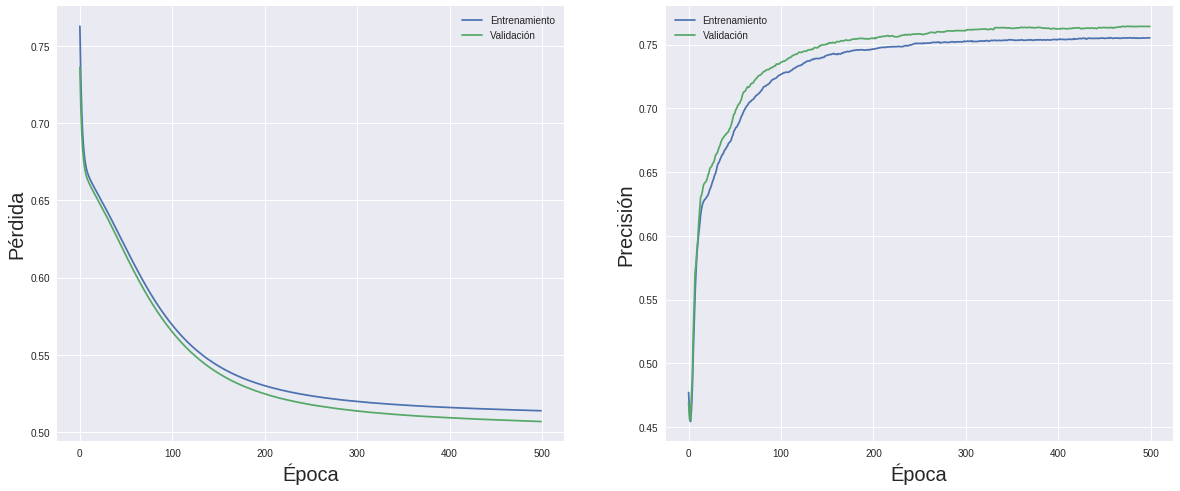

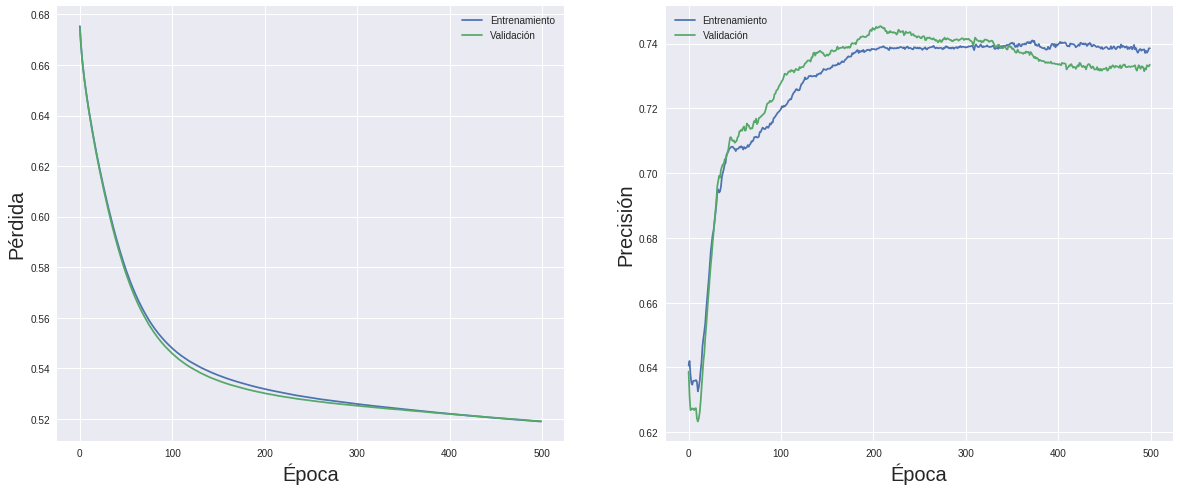

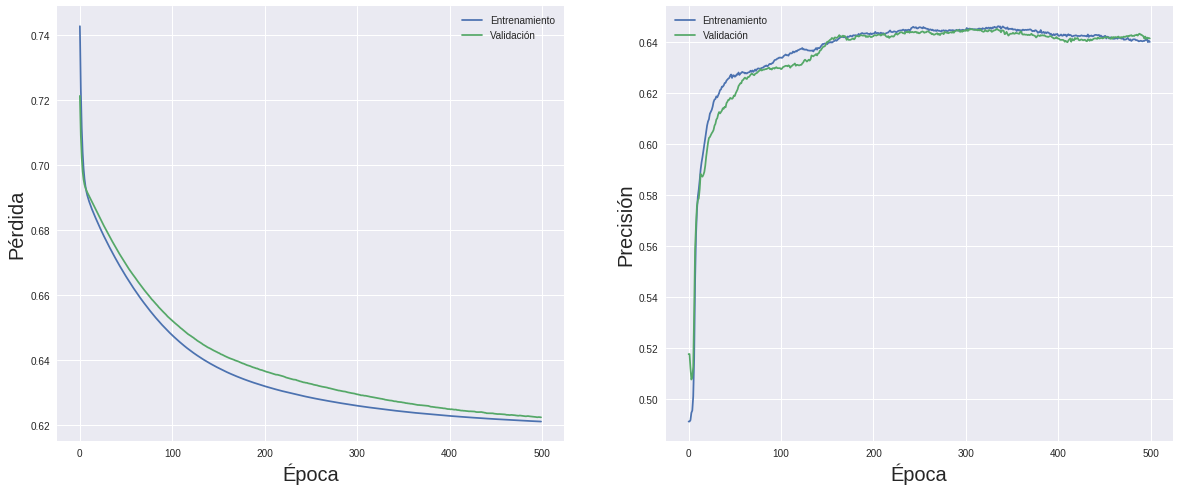

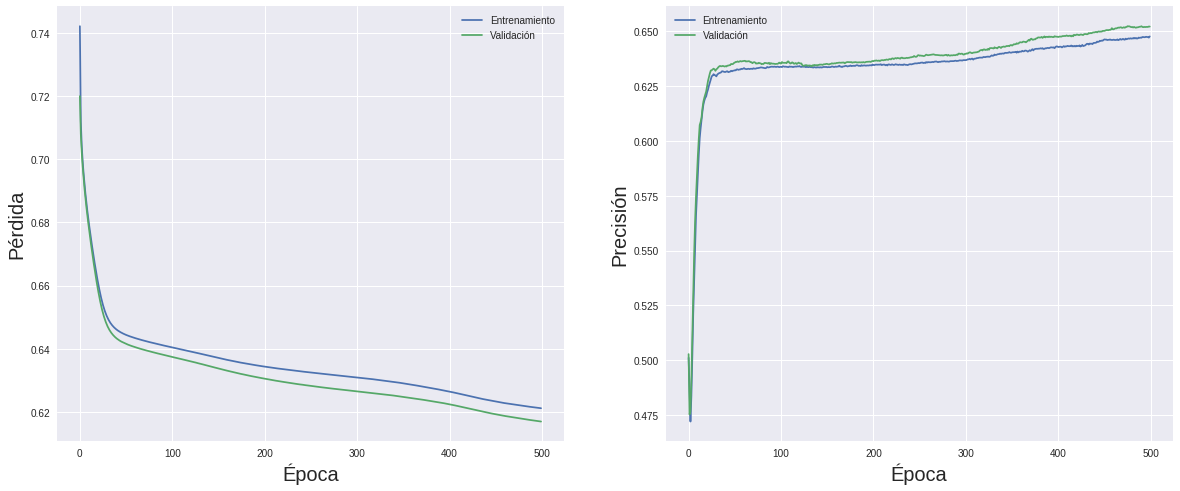

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
folder_id='1twdy-qoaB8mS_LsalUd7VnTu5Ct2cPHn' #Folder https://drive.google.com/drive/folders/1twdy-qoaB8mS_LsalUd7VnTu5Ct2cPHn
def show_results(counter, log1):
    fig, axes = plt.subplots(1, 2, figsize=(20,8))
    ax1, ax2 = axes
    ax1.plot(log1.history['loss'], label='Entrenamiento')
    ax1.plot(log1.history['val_loss'], label='Validación')
    ax1.set_xlabel('Época',{'fontsize':20}); ax1.set_ylabel('Pérdida',{'fontsize':20})
    
    ax2.plot(log1.history['acc'], label='Entrenamiento')
    ax2.plot(log1.history['val_acc'], label='Validación')
    ax2.set_xlabel('Época',{'fontsize':20}); ax2.set_ylabel('Precisión',{'fontsize':20})
    for ax in axes: ax.legend()
      
    fig.savefig("nn_1_4_{}.png".format(counter))         
 
log1=nn_1_4_logs
for counter, log in enumerate(log1):
  show_results(counter, log)





In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#As experimented in mayfield et al. 2015
nn_2_60_acc_test=[]
nn_2_60_acc_train=[]
nn_2_60_logs=[]
for df in datasets:
  X = df.drop('cluster', axis=1)
  y = df['cluster']
  
  from sklearn import preprocessing
  X_trainval, X_test, y_trainval, y_test = train_test_split(X,y,test_size=0.1)
  scaler = preprocessing.StandardScaler().fit(X_trainval)
  X_trainval = scaler.transform(X_trainval)
  
  X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, test_size=0.3)
  
  X_test = scaler.transform(X_test) 
  
  from keras.models import Sequential
  from keras.layers import Dense, Flatten, Dropout, BatchNormalization
  from keras.optimizers import Adam
  from keras import regularizers 
  K.tensorflow_backend._get_available_gpus()

  model = Sequential([
      Dense(60, activation='sigmoid',input_shape=(10,)),
      Dense(60, activation='sigmoid'),
      Dense(1, activation='sigmoid')])
  model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
  log = model.fit(X_train, y_train, epochs=500, batch_size=256, validation_data=[X_val, y_val])
  _, test_acc = model.evaluate(x=X_test, y=y_test,verbose=1)
  train_acc = log.history['acc'][-1]
  nn_2_60_acc_test.append(test_acc)
  nn_2_60_acc_train.append(train_acc)
  nn_2_60_logs.append(log)
  K.clear_session()

      
folder_id='1ueCCZhalRvmM2nXLA1gZihsYJHDNqDXr' 
training_nn_2_60 = pd.DataFrame()
for log in nn_2_60_logs:
  label=np.repeat('nn_2_60',len(log.history['val_loss']))
  df = pd.DataFrame(dict(loss=log.history['loss'], val_loss=log.history['val_loss'], model=label))
  training_nn_2_60 = training_nn_2_60.append(df, ignore_index = True) 
training_nn_2_60.to_csv('training_nn_2_60.csv', sep=',', encoding='utf-8')

file = drive.CreateFile({'parents':[{u'id': folder_id}]})
file.SetContentFile('training_nn_2_60.csv')
file.Upload()

      
      

# NN


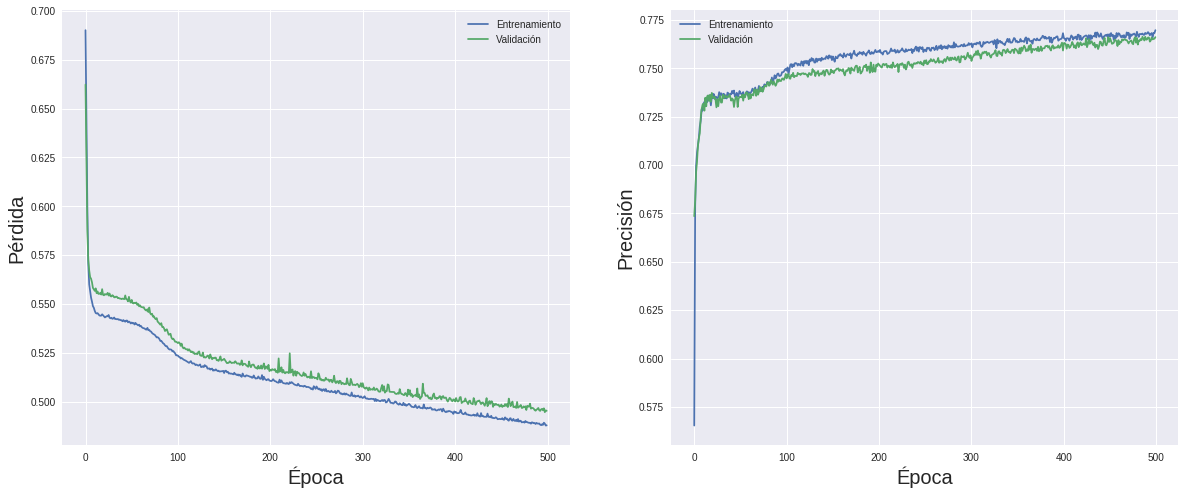

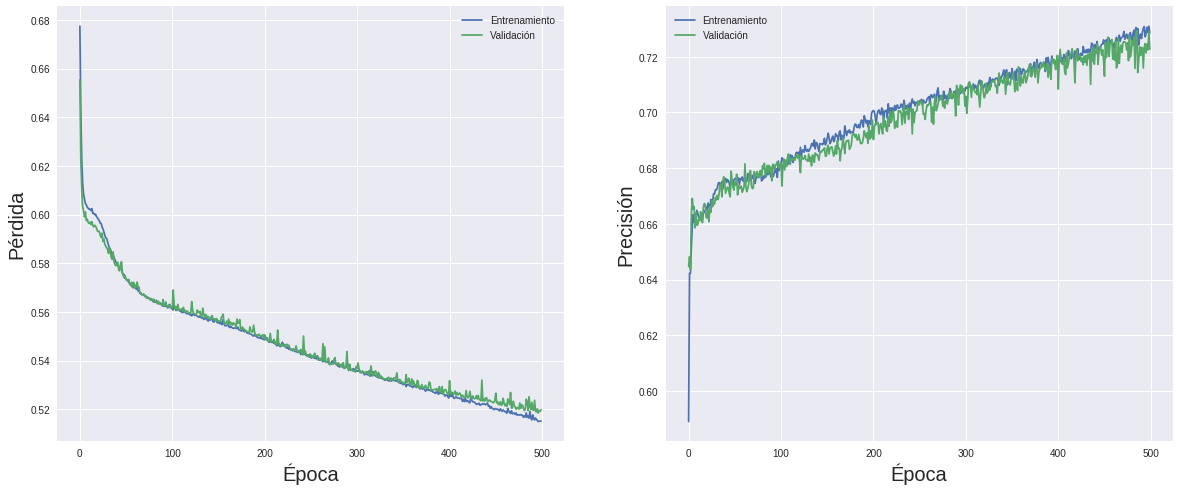

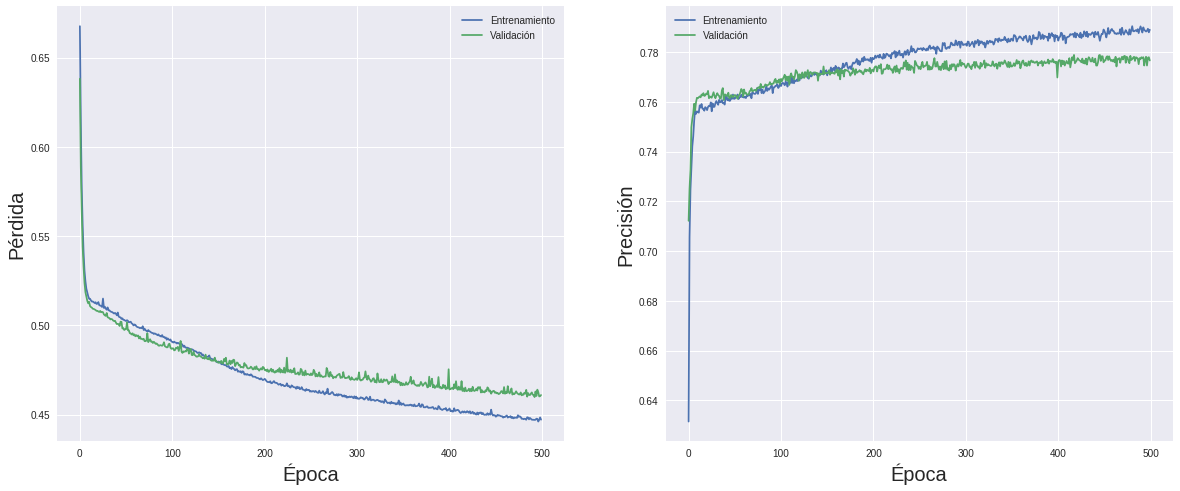

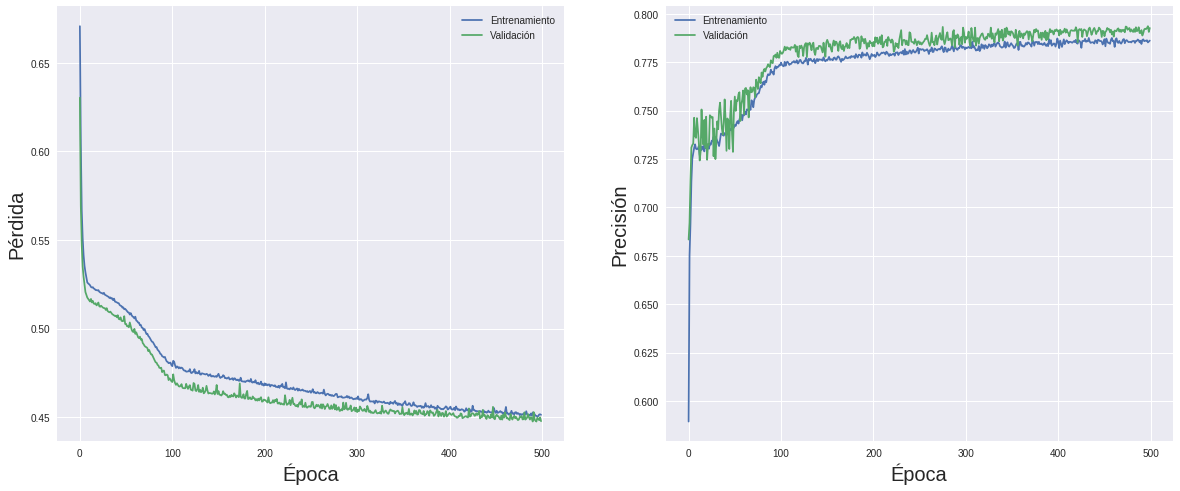

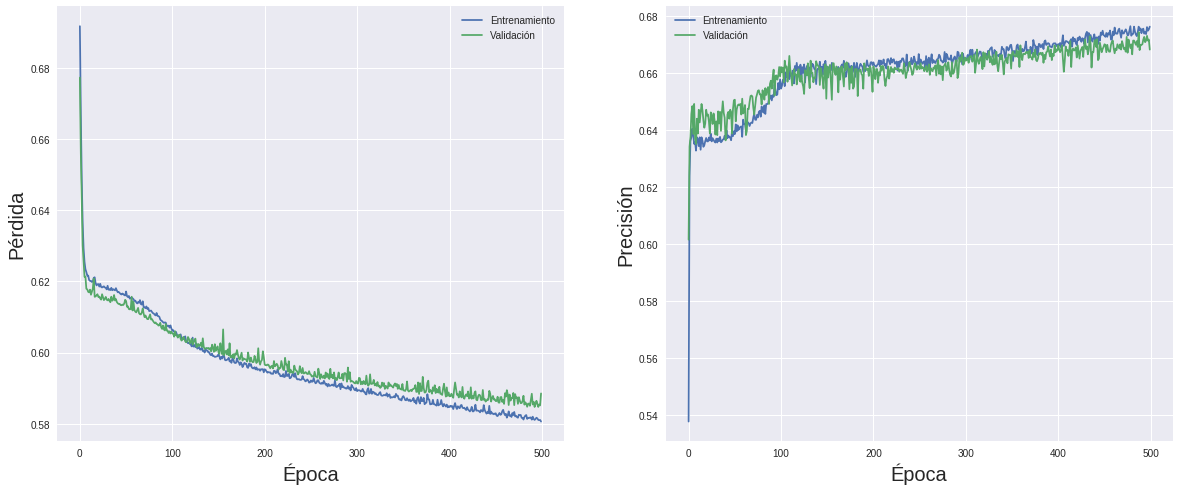

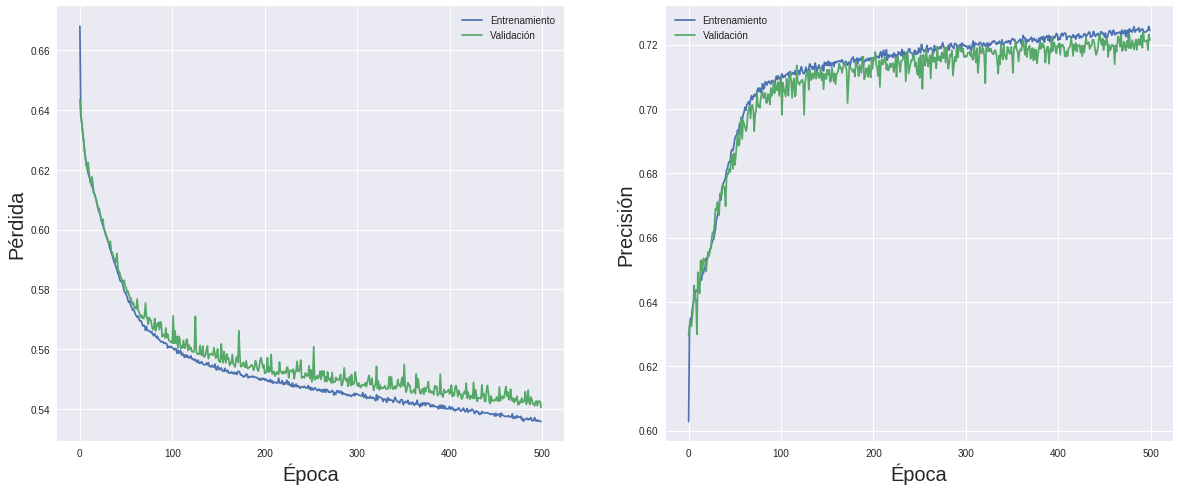

In [0]:
folder_id='1twdy-qoaB8mS_LsalUd7VnTu5Ct2cPHn' #Folder https://drive.google.com/drive/folders/1twdy-qoaB8mS_LsalUd7VnTu5Ct2cPHn
def show_results(counter, log1):
    fig, axes = plt.subplots(1, 2, figsize=(20,8))
    ax1, ax2 = axes
    ax1.plot(log1.history['loss'], label='Entrenamiento')
    ax1.plot(log1.history['val_loss'], label='Validación')
    ax1.set_xlabel('Época',{'fontsize':20}); ax1.set_ylabel('Pérdida',{'fontsize':20})
    
    ax2.plot(log1.history['acc'], label='Entrenamiento')
    ax2.plot(log1.history['val_acc'], label='Validación')
    ax2.set_xlabel('Época',{'fontsize':20}); ax2.set_ylabel('Precisión',{'fontsize':20})
    for ax in axes: ax.legend()
      
    fig.savefig("nn_2_60_{}.png".format(counter))         
 
log1=nn_2_60_logs
for counter, log in enumerate(log1):
  show_results(counter, log)



In [0]:
nn_4_128_acc_test=[]
nn_4_128_acc_train=[]
nn_4_128_logs=[]
for df in datasets:
  X = df.drop('cluster', axis=1)
  y = df['cluster']
  X_trainval, X_test, y_trainval, y_test = train_test_split(X,y,test_size=0.1)
  X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, test_size=0.3)

  from sklearn import preprocessing
  scaler = preprocessing.StandardScaler().fit(X_trainval)
  X_trainval = scaler.transform(X_trainval)
  X_test = scaler.transform(X_test) 

  from keras.models import Sequential
  from keras.layers import Dense, Flatten, Dropout, BatchNormalization
  from keras.optimizers import Adam
  from keras import regularizers 
  K.tensorflow_backend._get_available_gpus()

  model = Sequential([
      Dense(128, activation='relu',input_shape=(10,)),
      BatchNormalization(),
      Dropout(rate=0.1),
      Dense(64, activation='relu'),
      Dropout(rate=0.1),
      Dense(32, activation='relu'),
      Dropout(rate=0.1),
      Dense(16, activation='relu'),
      Dropout(rate=0.1),
      Dense(1, activation='sigmoid')])
  model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
  log = model.fit(X_train, y_train, epochs=500, batch_size=256, validation_data=[X_val, y_val])
  _, test_acc = model.evaluate(x=X_test, y=y_test,verbose=1)
  train_acc = log.history['acc'][-1]
  nn_4_128_acc_test.append(test_acc)
  nn_4_128_acc_train.append(train_acc)
  nn_4_128_logs.append(log)
  K.clear_session()
  
folder_id='1ueCCZhalRvmM2nXLA1gZihsYJHDNqDXr' 
training_nn_4_128 = pd.DataFrame()
for log in nn_4_128_logs:
  label=np.repeat('nn_4_128',len(log.history['val_loss']))
  df = pd.DataFrame(dict(loss=log.history['loss'], val_loss=log.history['val_loss'], model=label))
  training_nn_4_128 = training_nn_4_128.append(df, ignore_index = True) 
training_nn_4_128.to_csv('training_nn_4_128.csv', sep=',', encoding='utf-8')

file = drive.CreateFile({'parents':[{u'id': folder_id}]})
file.SetContentFile('training_nn_4_128.csv')
file.Upload()


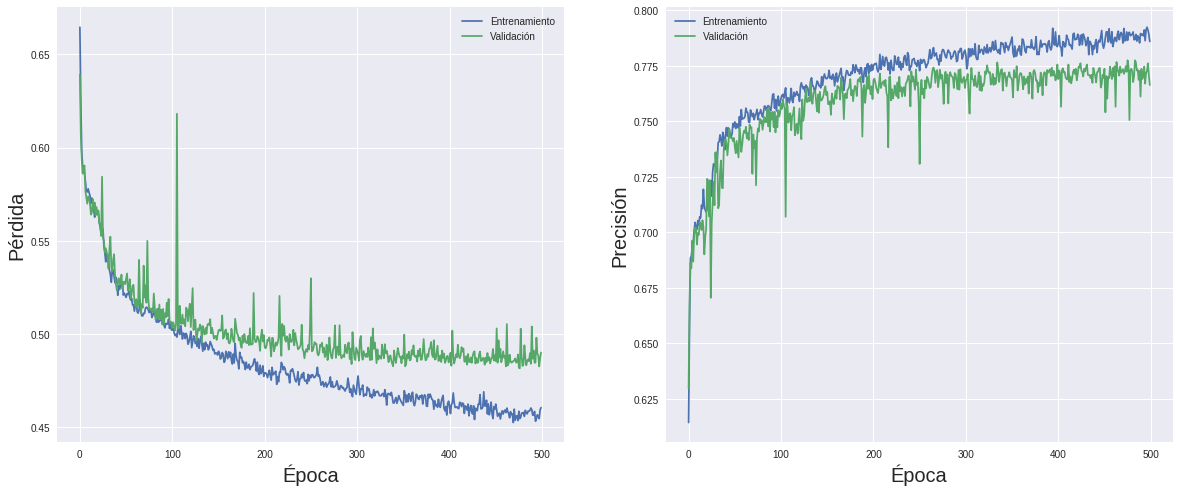

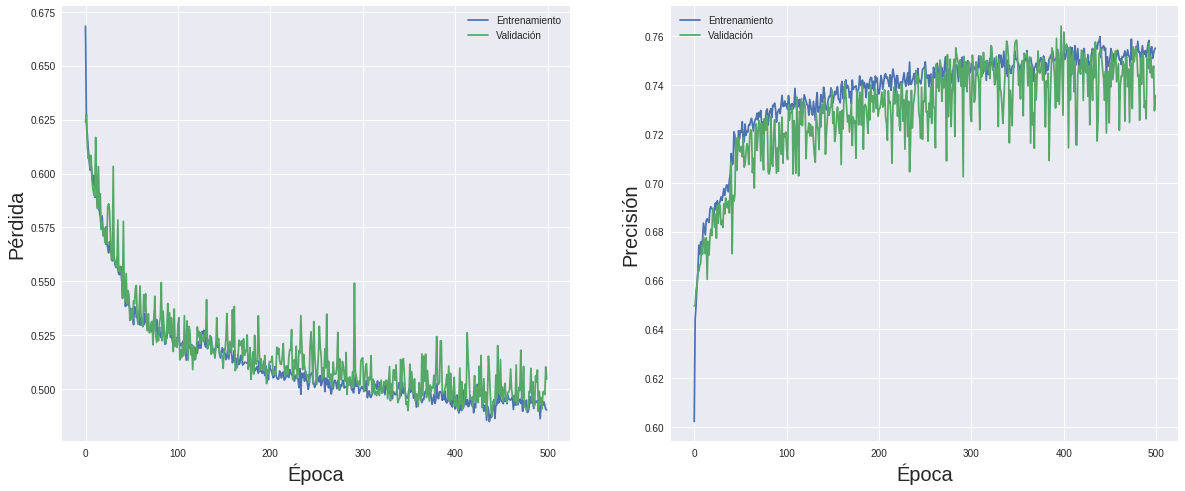

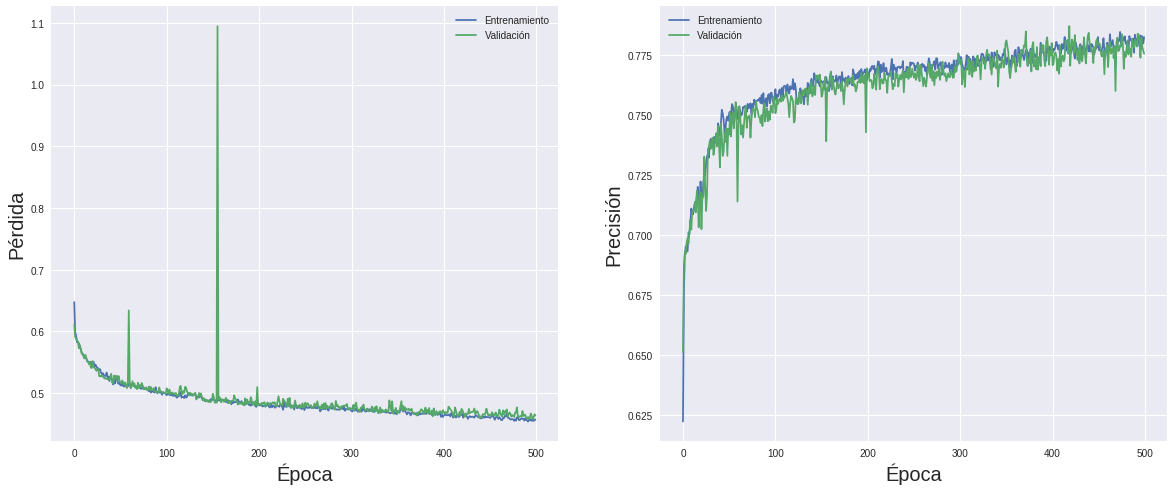

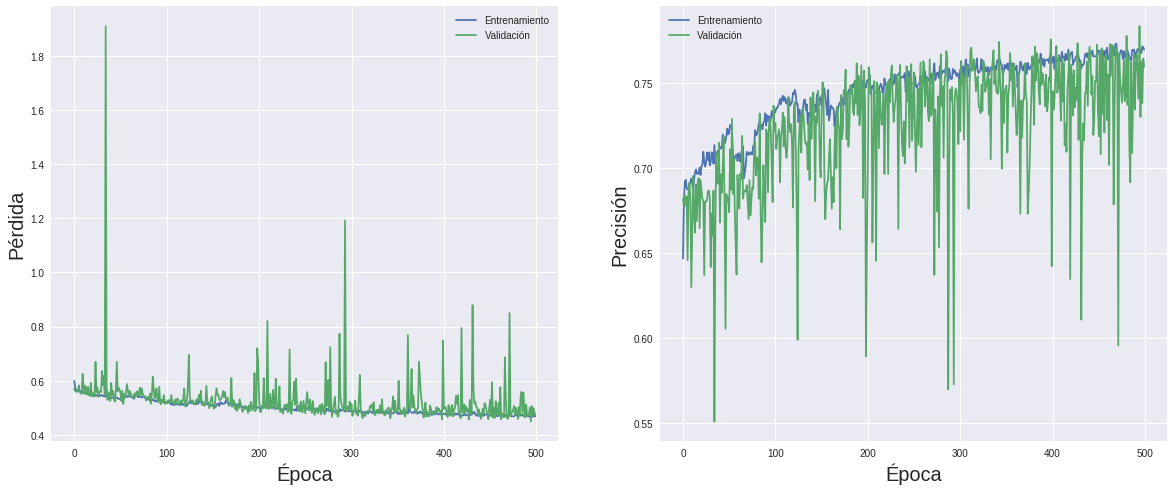

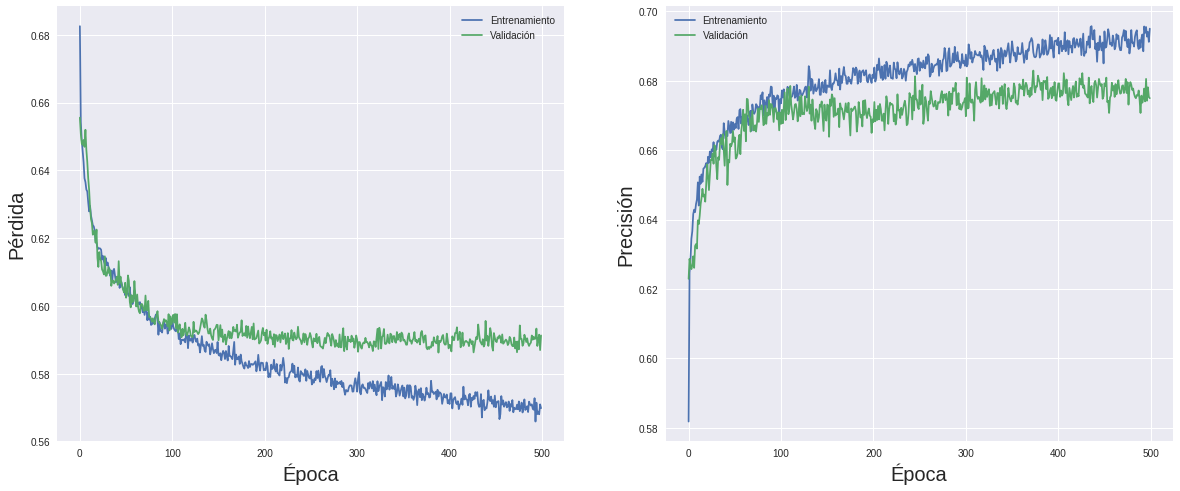

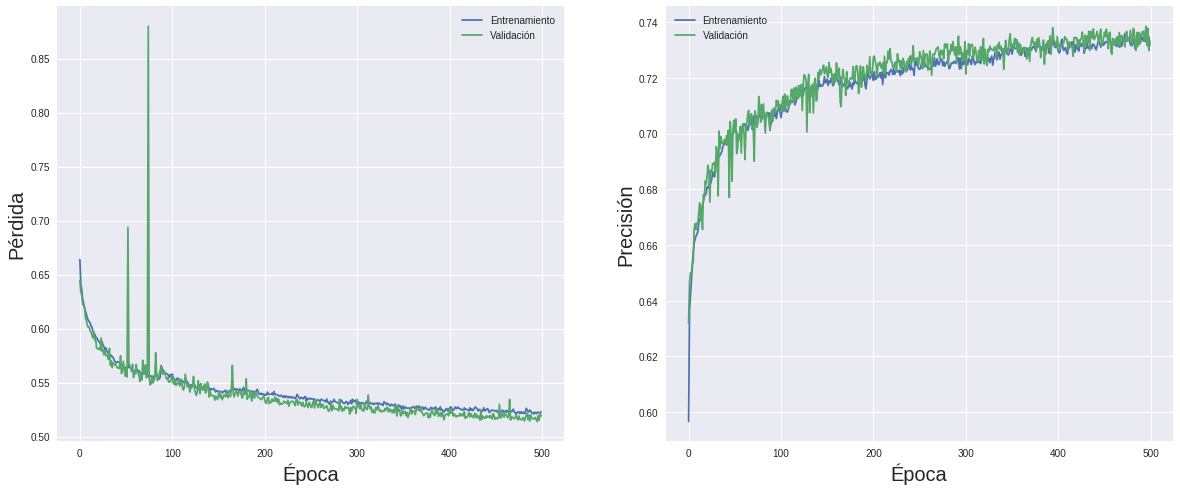

In [0]:
folder_id='1twdy-qoaB8mS_LsalUd7VnTu5Ct2cPHn' #Folder https://drive.google.com/drive/folders/1twdy-qoaB8mS_LsalUd7VnTu5Ct2cPHn
def show_results(counter, log1):
    fig, axes = plt.subplots(1, 2, figsize=(20,8))
    ax1, ax2 = axes
    ax1.plot(log1.history['loss'], label='Entrenamiento')
    ax1.plot(log1.history['val_loss'], label='Validación')
    ax1.set_xlabel('Época',{'fontsize':20}); ax1.set_ylabel('Pérdida',{'fontsize':20})
    
    ax2.plot(log1.history['acc'], label='Entrenamiento')
    ax2.plot(log1.history['val_acc'], label='Validación')
    ax2.set_xlabel('Época',{'fontsize':20}); ax2.set_ylabel('Precisión',{'fontsize':20})
    for ax in axes: ax.legend()
      
    fig.savefig("nn_4_128_{}.png".format(counter))         
 
log1=nn_4_128_logs
for counter, log in enumerate(log1):
  show_results(counter, log)


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

nn_6_1024_acc_test=[]
nn_6_1024_acc_train=[]
nn_6_1024_logs=[]
for df in datasets:
  X = df.drop('cluster', axis=1)
  y = df['cluster']
  
  from sklearn import preprocessing
  X_trainval, X_test, y_trainval, y_test = train_test_split(X,y,test_size=0.1,random_state=0)
  scaler = preprocessing.StandardScaler().fit(X_trainval)
  X_trainval = scaler.transform(X_trainval)
  X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, test_size=0.3,random_state=0)
  X_test = scaler.transform(X_test) 
 

  from keras.models import Sequential
  from keras.layers import Dense, Flatten, Dropout, BatchNormalization
  from keras.optimizers import Adam
  from keras import regularizers 
  K.tensorflow_backend._get_available_gpus()

  model = Sequential([
      Dense(1024, activation='relu', input_shape=(10,)),
      BatchNormalization(),
      Dense(512, activation='relu'),
      Dropout(rate=0.1),
      Dense(256, activation='relu'),
      BatchNormalization(),
      Dense(128, activation='relu'),
      Dropout(rate=0.1),
      Dense(64, activation='relu'),
      Dropout(rate=0.1),
      Dense(32, activation='relu'),    
      Dense(1, activation='sigmoid')])
  model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
  log = model.fit(X_train, y_train, epochs=500, batch_size=256, validation_data=[X_val, y_val])
  _, test_acc = model.evaluate(x=X_test, y=y_test,verbose=1)
  train_acc = log.history['acc'][-1]
  nn_6_1024_acc_test.append(test_acc)
  nn_6_1024_acc_train.append(train_acc)
  nn_6_1024_logs.append(log)
  K.clear_session()
  
  
folder_id='1ueCCZhalRvmM2nXLA1gZihsYJHDNqDXr' 
training_nn_6_1024 = pd.DataFrame()
for log in nn_6_1024_logs:
  label=np.repeat('nn_6_1024',len(log.history['val_loss']))
  df = pd.DataFrame(dict(loss=log.history['loss'], val_loss=log.history['val_loss'], model=label))
  training_nn_6_1024 = training_nn_6_1024.append(df, ignore_index = True) 
training_nn_6_1024.to_csv('training_nn_6_1024.csv', sep=',', encoding='utf-8')

file = drive.CreateFile({'parents':[{u'id': folder_id}]})
file.SetContentFile('training_nn_6_1024.csv')
file.Upload()

In [0]:
folder_id='1twdy-qoaB8mS_LsalUd7VnTu5Ct2cPHn' #Folder https://drive.google.com/drive/folders/1twdy-qoaB8mS_LsalUd7VnTu5Ct2cPHn
def show_results(counter, log1):
    fig, axes = plt.subplots(1, 2, figsize=(20,8))
    ax1, ax2 = axes
    ax1.plot(log1.history['loss'], label='Entrenamiento')
    ax1.plot(log1.history['val_loss'], label='Validación')
    ax1.set_xlabel('Época',{'fontsize':20}); ax1.set_ylabel('Pérdida',{'fontsize':20})
    
    ax2.plot(log1.history['acc'], label='Entrenamiento')
    ax2.plot(log1.history['val_acc'], label='Validación')
    ax2.set_xlabel('Época',{'fontsize':20}); ax2.set_ylabel('Precisión',{'fontsize':20})
    for ax in axes: ax.legend()
      
    fig.savefig("nn_6_1024{}.png".format(counter))         
 
log1=nn_6_1024_logs
for counter, log in enumerate(log1):
  show_results(counter, log)

In [0]:
drive = GoogleDrive(gauth)

nn_6_2048_acc_test=[]
nn_6_2048_acc_train=[]
nn_6_2048_logs=[]
for df in datasets:
  X = df.drop('cluster', axis=1)
  y = df['cluster']
  
  from sklearn import preprocessing
  X_trainval, X_test, y_trainval, y_test = train_test_split(X,y,test_size=0.1,random_state=0)
  scaler = preprocessing.StandardScaler().fit(X_trainval)
  X_trainval = scaler.transform(X_trainval)
  X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, test_size=0.3,random_state=0)
  X_test = scaler.transform(X_test) 
 

  from keras.models import Sequential
  from keras.layers import Dense, Flatten, Dropout, BatchNormalization
  from keras.optimizers import Adam
  from keras import regularizers 
  K.tensorflow_backend._get_available_gpus()

  model = Sequential([
      Dense(2048, activation='relu',kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)),
      BatchNormalization(),
      Dense(1024, activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.01)),
      Dropout(rate=0.1),
      Dense(512, activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.01)),
      BatchNormalization(),
      Dense(128, activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.01)),
      Dropout(rate=0.1),
      Dense(32, activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.01)),
      Dropout(rate=0.1),
      Dense(16, activation='relu'),    
      Dense(1, activation='sigmoid')])
  model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
  log = model.fit(X_train, y_train, epochs=500, batch_size=256, validation_data=[X_val, y_val])
  _, test_acc = model.evaluate(x=X_test, y=y_test,verbose=1)
  train_acc = log.history['acc'][-1]
  nn_6_2048_acc_test.append(test_acc)
  nn_6_2048_acc_train.append(train_acc)
  nn_6_2048_logs.append(log)
  K.clear_session()
  
  
folder_id='1ueCCZhalRvmM2nXLA1gZihsYJHDNqDXr' 
training_nn_6_2048 = pd.DataFrame()
for log in nn_6_2048_logs:
  label=np.repeat('nn_6_2048',len(log.history['val_loss']))
  df = pd.DataFrame(dict(loss=log.history['loss'], val_loss=log.history['val_loss'], model=label))
  training_nn_6_2048 = training_nn_6_2048.append(df, ignore_index = True) 
training_nn_6_2048.to_csv('training_nn_6_2048.csv', sep=',', encoding='utf-8')

file = drive.CreateFile({'parents':[{u'id': folder_id}]})
file.SetContentFile('training_nn_6_2048.csv')
file.Upload()

In [0]:

images=list(filter(lambda x: 'nn' in x, os.listdir('.')))
for image in images:
  file = drive.CreateFile({'parents':[{u'id': folder_id}]})
  file.SetContentFile(image)
  file.Upload()



In [0]:
df_1 = pd.read_csv('training_deforested_7x7_roi_1_v3.csv', sep=',')
df_3 = pd.read_csv('training_deforested_7x7_roi_3_v3.csv', sep=',')
df_4 = pd.read_csv('training_deforested_7x7_roi_4_v3.csv', sep=',')
df_6 = pd.read_csv('training_deforested_7x7_roi_6_v3.csv', sep=',')
df_8 = pd.read_csv('training_deforested_7x7_roi_8_v3.csv', sep=',')

tous = [df_1, df_3, df_4,df_6,df_8]

df_tot=result = pd.concat(tous)

datasets = [df_1,df_3,df_4,df_6,df_8,df_tot]
# datasets = [df_1] #for testing
datasets = list(map(lambda x: x.drop(['carbon_density','system:index', '.geo'],axis=1), datasets))

In [0]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
  
nn_256_5_r2_test=[]
nn_256_5_r2_train=[]
nn_256_5_logs=[]  #regresión approach
for df in datasets:
  X = df.drop(['cluster','cluster_mean'], axis=1)
  y = df['cluster_mean']
  
  from sklearn import preprocessing
  X_trainval, X_test, y_trainval, y_test = train_test_split(X,y,test_size=0.1,random_state=0)
  scaler = preprocessing.StandardScaler().fit(X_trainval)
  X_trainval = scaler.transform(X_trainval)
  X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, test_size=0.3,random_state=0)
  X_test = scaler.transform(X_test) 
 

  from keras.models import Sequential
  from keras.layers import Dense, Flatten, Dropout, BatchNormalization
  from keras.optimizers import Adam
  from keras import regularizers 
  K.tensorflow_backend._get_available_gpus()

  model = Sequential([
  #     Dense(1024, activation='relu', input_shape=(10,)),
  #     BatchNormalization(),
  #     Dense(512, activation='relu',input_shape=(10,)),
      Dense(256, activation='relu',input_shape=(10,)),
      BatchNormalization(),
      Dense(128, activation='relu'),
      Dense(64, activation='relu'),
      Dropout(rate=0.1),
      Dense(32, activation='relu'),
      #Dense(16, activation='relu'),
      #Dense(8, activation='relu'),
      Dense(16, activation='relu'),
      
  #     Dense(128, activation='relu'),
  #     Dense(64, activation='relu'),
  #     Dense(32, activation='relu'),
  #     Dense(16, activation='relu'),
      Dense(1)])
  model.compile(loss='mse', optimizer=Adam(0.001), metrics=[r2_keras])
  log = model.fit(X_train, y_train, epochs=500, batch_size=256, validation_data=[X_val, y_val])
  
  _, test_mse = model.evaluate(x=X_test, y=y_test,verbose=1)
  y_predicted = model.predict(x=X_test,verbose=1)
  train_mse = log.history['r2_keras'][-1]
  nn_256_5_r2_test.append(test_mse)
  nn_256_5_r2_train.append(train_mse)
  
  nn_256_5_logs.append(log)
  K.clear_session()

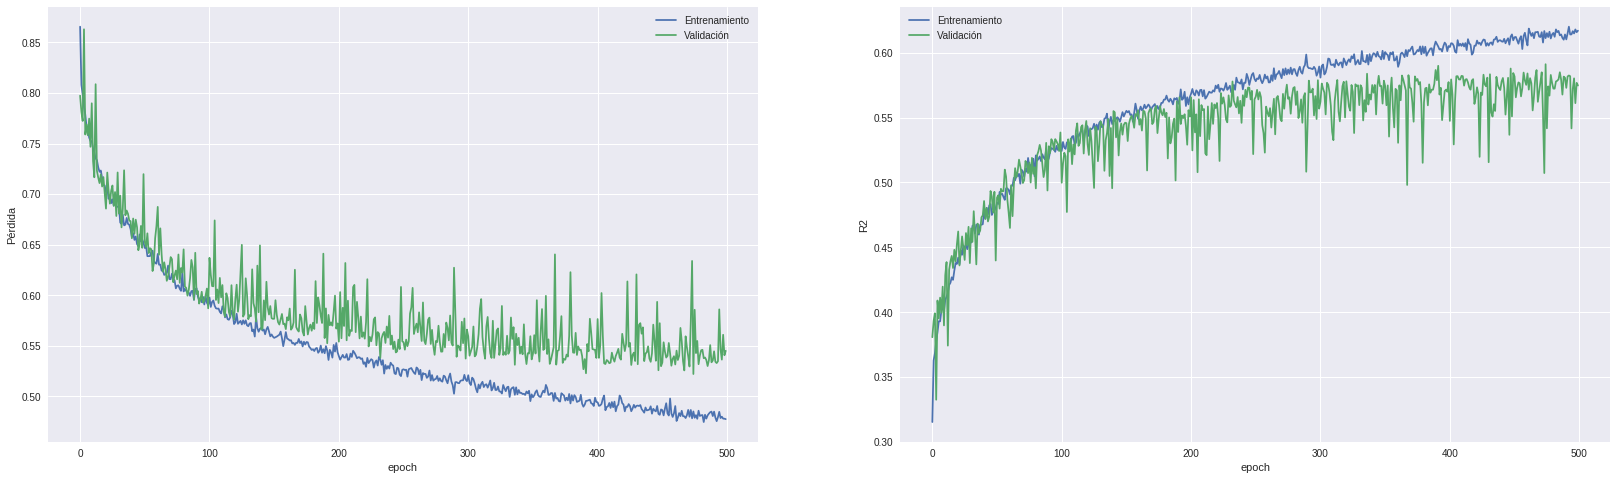

In [0]:
log1 = nn_256_5_logs[5]
def show_results(log1):
    fig, axes = plt.subplots(1, 2, figsize=(28,8))
    ax1, ax2 = axes
    ax1.plot(log1.history['loss'], label='Entrenamiento')
    ax1.plot(log1.history['val_loss'], label='Validación')
    ax1.set_xlabel('epoch'); ax1.set_ylabel('Pérdida')
    ax2.plot(log1.history['r2_keras'], label='Entrenamiento')
    ax2.plot(log1.history['val_r2_keras'], label='Validación')
    ax2.set_xlabel('epoch'); ax2.set_ylabel('R2')
    for ax in axes: ax.legend()
    fig.savefig("NN_256_acc_per_regre.png")

show_results(log1)
images=list(filter(lambda x: 'nn' in x, os.listdir('.')))
for image in images:
  file = drive.CreateFile({'parents':[{u'id': folder_id}]})
  file.SetContentFile(image)
  file.Upload()

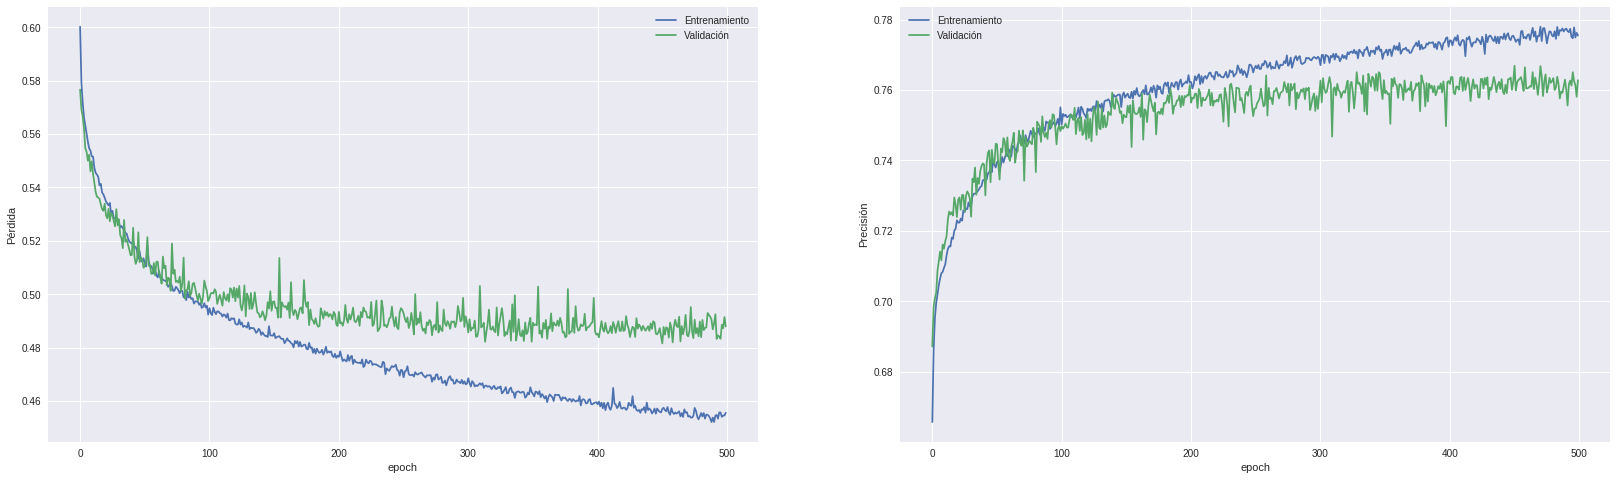

In [0]:
log1=nn_256_5_logs[5]
def show_results(log1):
    fig, axes = plt.subplots(1, 2, figsize=(28,8))
    ax1, ax2 = axes
    ax1.plot(log1.history['loss'], label='Entrenamiento')
    ax1.plot(log1.history['val_loss'], label='Validación')
    ax1.set_xlabel('epoch'); ax1.set_ylabel('Pérdida')
    ax2.plot(log1.history['acc'], label='Entrenamiento')
    ax2.plot(log1.history['val_acc'], label='Validación')
    ax2.set_xlabel('epoch'); ax2.set_ylabel('Precisión')
    for ax in axes: ax.legend()
    fig.savefig("NN_256_acc_per.png")

show_results(log1)

In [0]:
folder_id
file = drive.CreateFile({'parents':[{u'id': folder_id}]})
file.SetContentFile('NN_256_acc_per_regre.png')
file.Upload()

In [0]:
clusters = ['MDD', 'Iquitos','Tarapoto', 'Ucayali', 'Pucallpa']
rf = ['RandomForest','RandomForest','RandomForest','RandomForest','RandomForest']
log = ['Logistic Regressions','Logistic Regressions','Logistic Regressions','Logistic Regressions','Logistic Regressions']
nb = ['Naive Bayes','Naive Bayes','Naive Bayes','Naive Bayes','Naive Bayes']
nn_256 = ['NeuralNetwork_256','NeuralNetwork_256','NeuralNetwork_256','NeuralNetwork_256','NeuralNetwork_256']
nn_60 = ['NeuralNetwork_60','NeuralNetwork_60','NeuralNetwork_60','NeuralNetwork_60','NeuralNetwork_60']
            

In [0]:
an = nn_1_4 + nn_2_60 + nn_4_120 + nn_6_256 + nn_6_1024 + nn_6_2048
clusters = clusters + clusters + clusters + clusters + clusters + clusters 
acc = rf_acc_test+log_acc_test+nb_acc_test+nn_256_5_acc_test+nn_60_2_acc_test
# df = pd.DataFrame(dict(acc=acc, clusters=clusters, type_an=an))
# df.to_csv('resultados.csv', sep='\t', encoding='utf-8')
# df

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
folder_id='1ueCCZhalRvmM2nXLA1gZihsYJHDNqDXr'
file = drive.CreateFile({'parents':[{u'id': folder_id}]})
file.SetContentFile('resultadosnn.csv')
file.Upload()

In [0]:
# df = pd.read_csv('resultados.csv', sep='\t')
# df

In [0]:
# tres_dff = pd.read_csv('tree_df.csv', sep=',')ees = np.arange(2,300,10)
# tres_dff


In [0]:
labels=[100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000]
0: 100
1: 200
2: 300
3: 400
4: 500
5: 600
6: 700
7: 800
8: 900
9: 1000
10: 1000
11: 2000
12: 3000
13: 4000
14: 5000

In [0]:
matrix_losses = pd.read_csv('matrix.csv',sep=',')
matrix_losses = matrix_losses.drop(['Unnamed: 0'],axis=1)

In [0]:
matrix_losses

,0,1,2,3,4,5
0,0.808091,0.5115,0.5280,0.509519,0.5345,0.605462
1,0.478216,0.8320,0.5100,0.497996,0.5075,0.589237
2,0.490145,0.5025,0.8190,0.498998,0.5100,0.592563
3,0.478734,0.4940,0.5075,0.813627,0.5045,0.585206
4,0.497407,0.5120,0.5745,0.502505,0.6925,0.593470
5,0.922718,0.9360,0.9265,0.937876,0.8890,0.790386


In [0]:
!ls


 adc.json
'Copia de training_deforested_7x7_roi_3_v3.csv'
 ejepliyo.csv
 loss_per_meter.csv
 matrix.csv
 matrix_losses.png
 resultados.csv
 S4_carbon.csv
 sample_data
 training_deforested_7x7_geom.csv
 training_deforested_7x7_roi_1.csv
 training_deforested_7x7_roi_1_v3.csv
 training_deforested_7x7_roi_3_v3.csv
 training_deforested_7x7_roi_4_v3.csv
 training_deforested_7x7_roi_6_v3.csv
 training_deforested_7x7_roi_8_v3.csv
 training_deforested_7x7_with_cluster.csv
 training_deforested_7x7_withrate_roi.csv
 training_mixed_100.csv
 training_mixed_28oct_labeled.csv
 training_mixed_29oct_10k.csv
 training_mixed.csv
 training_mixed_v26oct.csv
 training_mixed_v28oct_labeled_mdd.csv
 training_mixed_v29oct_300m.csv
 training_mixed_v29oct_300m_geom.csv
 tree_df.csv
 validation_classified.csv
 validation_classified_no_lonlat.csv
 validation_classified_no_rate.csv
 validation_classified_rf_iquitos.csv


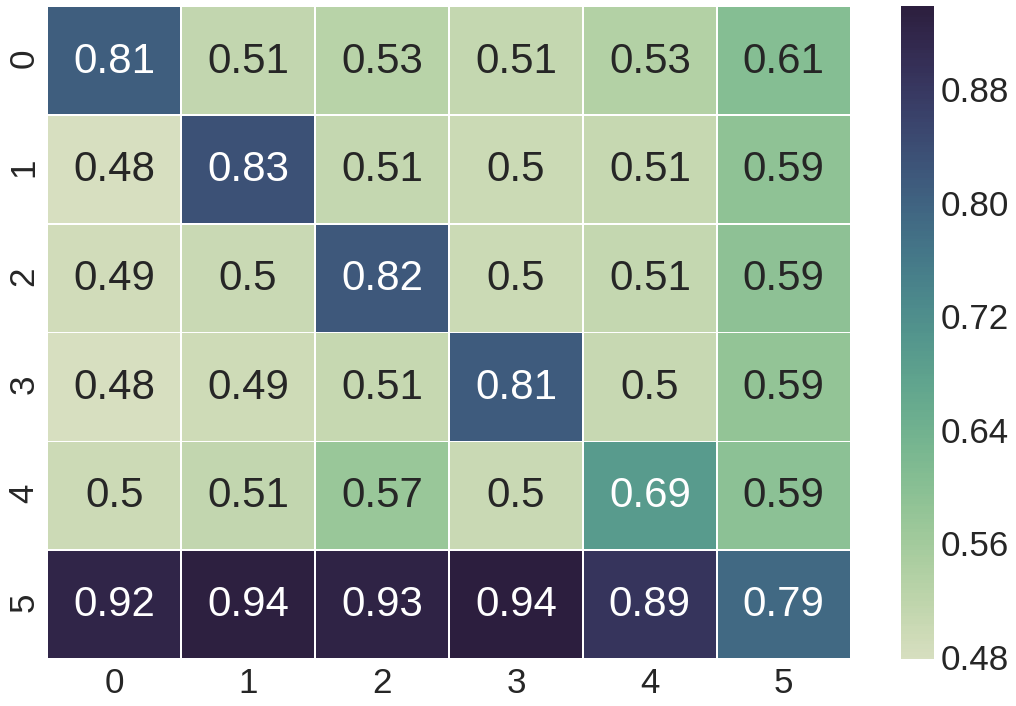

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=3.5)
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(18, 12))
cmap=sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)
heatmap = sns.heatmap(matrix_losses,cmap=cmap, annot=True, linewidths=.5, ax=ax)

f.savefig("matrix_losses.png")

In [0]:
file_matrix_loss = drive.CreateFile({'parents':[{u'id': folder_id}]})
file_matrix_loss.SetContentFile('matrix_losses.png')
file_matrix_loss.Upload()   


In [0]:
loss_m

,system:index,carbon_loss,.geo
0,0,2.184047e+05,NaN
1,1,4.405916e+05,NaN
2,2,6.692364e+05,NaN
3,3,9.075704e+05,NaN
4,4,1.150373e+06,NaN
5,5,1.391207e+06,NaN
6,6,1.631557e+06,NaN
7,7,1.868370e+06,NaN
8,8,2.103351e+06,NaN
9,9,2.338366e+06,NaN


In [0]:
labels=[100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000]
loss_m = pd.read_csv('loss_per_meter_salvacion_bocamanu.csv',sep=',')
testo=loss_m
testo=testo.drop(10)
# testo = loss_m['carbon_loss'] - loss_m['carbon_loss'] .shift(1)
testoa = np.array(testo['carbon_loss'])
testob= np.roll(testoa, 1)
# testo[0]=loss_m['carbon_loss'][0]
print(testoa)
print(testob)
pd.DataFrame((testoa-testob))

[  218404.71682485   440591.62852653   669236.40637003   907570.38003788
  1150372.68001165  1391207.02168579  1631556.62134682  1868369.83025505
  2103351.04493668  2338365.51232426  4574862.74838413  6536048.73292989
  8235374.47107801  9624241.31532468 10852133.54074378 12028699.75347313
 13137046.17931394 14178717.95873241 15177879.97434448 16052057.02887122
 16693539.70225343 17143546.65398487 17526848.26853156 17881327.42511674]
[17881327.42511674   218404.71682485   440591.62852653   669236.40637003
   907570.38003788  1150372.68001165  1391207.02168579  1631556.62134682
  1868369.83025505  2103351.04493668  2338365.51232426  4574862.74838413
  6536048.73292989  8235374.47107801  9624241.31532468 10852133.54074378
 12028699.75347313 13137046.17931394 14178717.95873241 15177879.97434448
 16052057.02887122 16693539.70225343 17143546.65398487 17526848.26853156]


,0
0,-1.766292e+07
1,2.221869e+05
2,2.286448e+05
3,2.383340e+05
4,2.428023e+05
5,2.408343e+05
6,2.403496e+05
7,2.368132e+05
8,2.349812e+05
9,2.350145e+05


In [0]:
loss_m

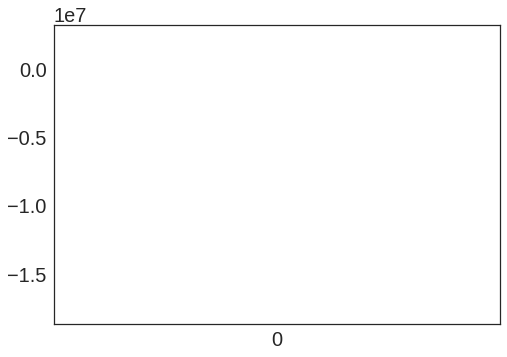

In [0]:
def show_results(log1):
#   sns.set(font_scale=2,style="whitegrid")
  sns.set_style("white")
  sns.despine(offset=10, trim=True);
  sns.pointplot()
  plt.plot(labels, pd.DataFrame((testoa-testob)))
#     ax1.plot(log1.history['val_loss'], label='Validación')
#   set_xlabel('epoch'); 
#   set_ylabel('Pérdida')
#   fig.savefig("NN_256_acc_per.png")

show_results(testo)

In [0]:
s4= pd.read_csv('S4_carbon.csv', sep=',')

def show_results(log1):
    
  plt.plot(x=s4['Unnamed: 0'], y = s4['x'], label='Entrenamiento')
#     ax1.plot(log1.history['val_loss'], label='Validación')
#   set_xlabel('epoch'); 
#   set_ylabel('Pérdida')
#   fig.savefig("NN_256_acc_per.png")

show_results(s4)

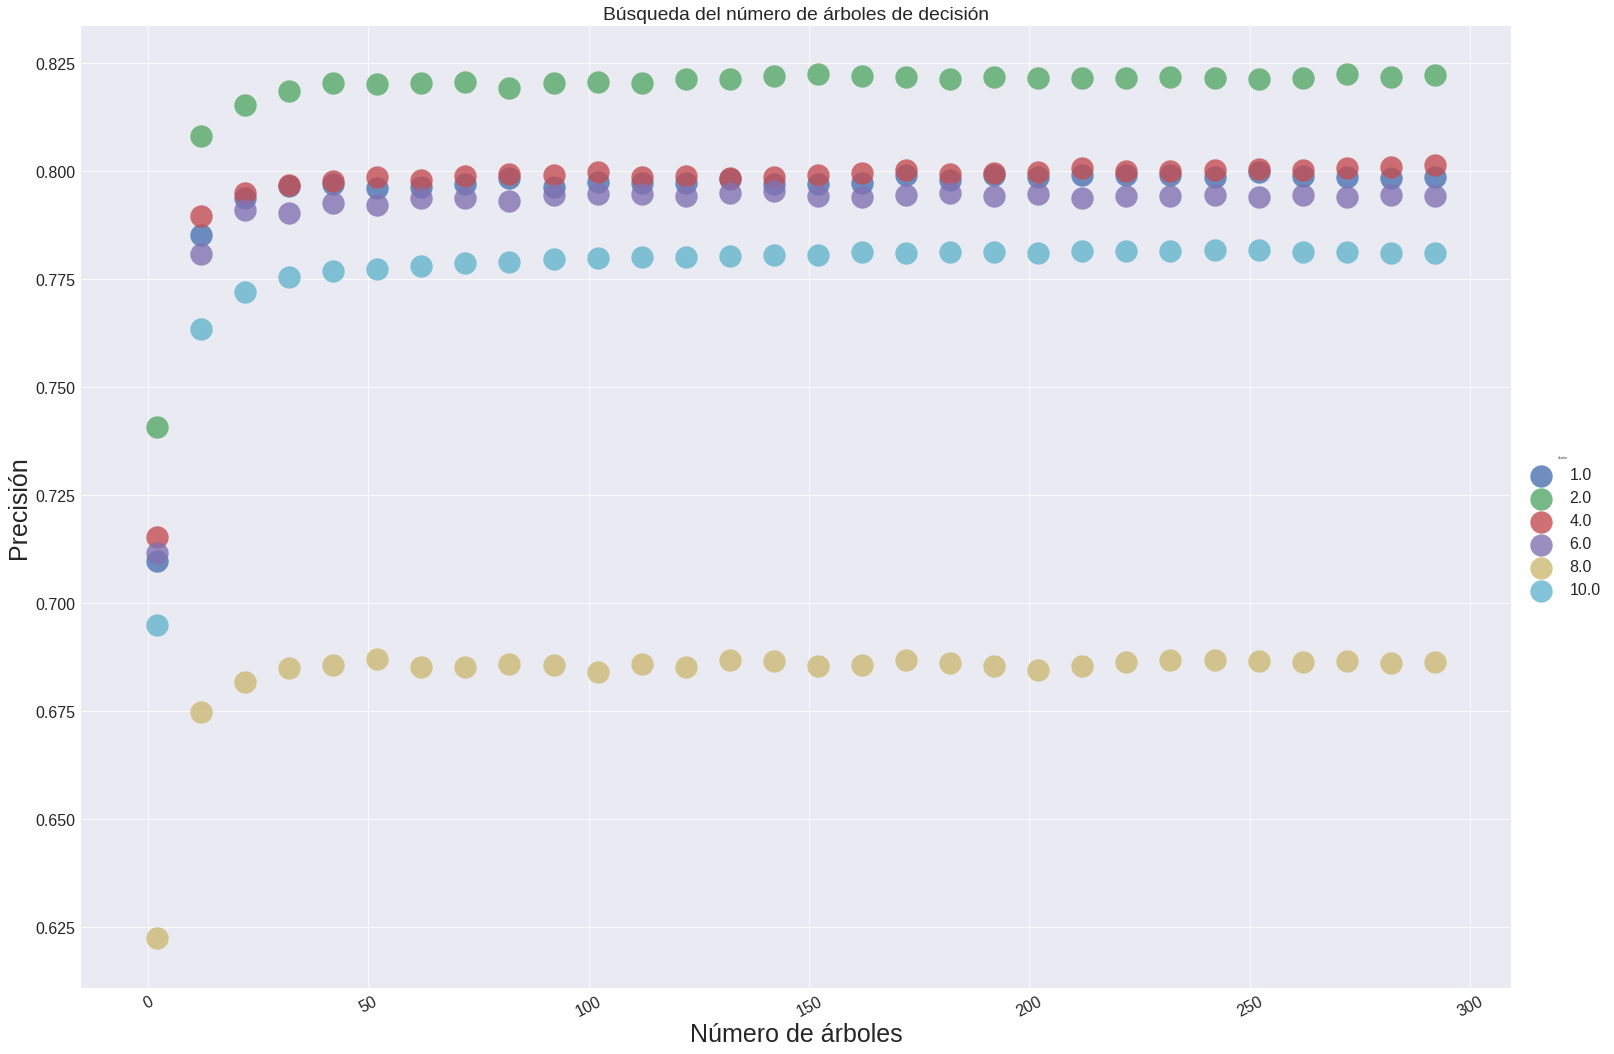

In [0]:
sns.set_context("paper", font_scale=2, rc={"font.size":8,"axes.labelsize":4})
ploteo=sns.lmplot(x='nTrees', y="acc", # Horizontal axis
           data=tres_dff, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="cluster",size=14,aspect=1.5,
                  scatter=True,
           scatter_kws={"marker": "D", # Set marker style
                        "s": 500}).set_xticklabels(rotation=27) # S marker size
# plt.subplots(figsize=(11.7, 8.27)) 
# Set title
plt.title('Búsqueda del número de árboles de decisión')

# Set x-axis label
plt.xlabel('Número de árboles',fontsize=25)

# Set y-axis label
plt.ylabel('Precisión',fontsize=25)

ploteo.savefig("tress_search.png")
file = drive.CreateFile({'parents':[{u'id': folder_id}]})
file.SetContentFile('tress_search.png')
file.Upload()

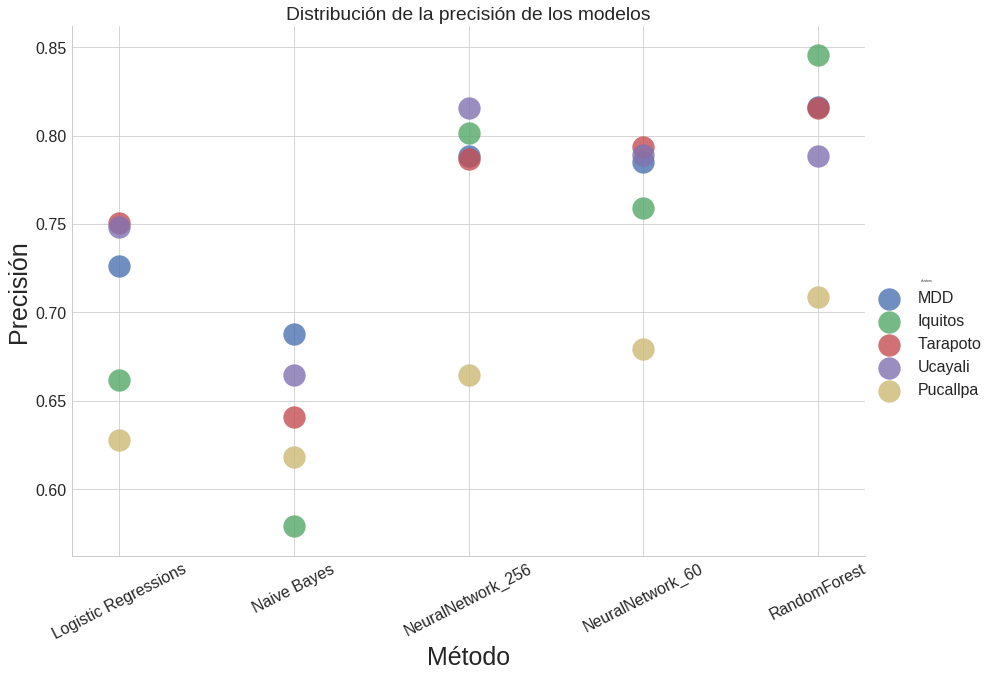

In [0]:
sns.set_context("paper", font_scale=2, rc={"font.size":8,"axes.labelsize":4})
ploteo=sns.lmplot(x="type_an", y="acc", # Horizontal axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="clusters",size=8,aspect=1.5,
           scatter_kws={"marker": "D", # Set marker style
                        "s": 500}).set_xticklabels(rotation=27) # S marker size
# plt.subplots(figsize=(11.7, 8.27)) 
# Set title
plt.title('Distribución de la precisión de los modelos')

# Set x-axis label
plt.xlabel('Método',fontsize=25)

# Set y-axis label
plt.ylabel('Precisión',fontsize=25)

ploteo.savefig("output.png")


In [0]:
folder_id
file = drive.CreateFile({'parents':[{u'id': folder_id}]})
file.SetContentFile('output.png')
file.Upload()

In [0]:
!ls

adc.json
ejepliyo.csv
loss_per_meter.csv
output.png
resultados.csv
training_deforested_7x7_geom.csv
training_deforested_7x7_roi_1.csv
training_deforested_7x7_roi_1_v3.csv
training_deforested_7x7_roi_3_v3.csv
training_deforested_7x7_roi_4_v3.csv
training_deforested_7x7_roi_6_v3.csv
training_deforested_7x7_roi_8_v3.csv
training_deforested_7x7_with_cluster.csv
training_deforested_7x7_withrate_roi.csv
training_mixed_100.csv
training_mixed_28oct_labeled.csv
training_mixed_29oct_10k.csv
training_mixed.csv
training_mixed_v26oct.csv
training_mixed_v28oct_labeled_mdd.csv
training_mixed_v29oct_300m.csv
training_mixed_v29oct_300m_geom.csv
validation_classified.csv
validation_classified_no_lonlat.csv
validation_classified_no_rate.csv


In [0]:
def show_results(log):
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    ax1, ax2 = axes
    ax1.plot(log.history['loss'], label='train')
    ax1.plot(log.history['val_loss'], label='validation')
    ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
    ax2.plot(log.history['acc'], label='train')
    ax2.plot(log.history['val_acc'], label='validation')
    ax2.set_xlabel('epoch'); ax2.set_ylabel('accuracy')
    for ax in axes: ax.legend()
show_results(log)

In [0]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_val).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_val, y_pred_keras)

In [0]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()